## Hiring Task - ML iGnosis Tech 
`-By Prathap M`

# **Customer Segmentation & Product Profitability Analysis**

## **Welcome to the World of Profitable Customers & Bestselling Products!**

### **Background**:  
As your favorite data scientist (or at least, I hope I am), I’ve been tasked with helping our **hypothetical** marketing department zero in on **the most profitable customer segments**. After all, why market to *everyone* when you can focus on the ones who will actually help you hit those revenue goals?

The goal of this analysis is simple:
- **Identify the most profitable customers**: You know, the ones who are ready to buy your products **at full price** (and maybe even ask for more)!
- **Find the bestselling products**: Because if you’re going to spend your marketing budget somewhere, it might as well be on things that fly off the shelf, right?

### **Objective: What We're Going to Figure Out**

1. **Who's the Real MVP?**  
   Are our most loyal customers:
   - **Married** or **Single**? (No judgment, we love both)
   - **Premium Buyers** or **Budget-Conscious Bargain Hunters**?  
   - **Working professionals** or **Retirees** living the dream with a lot of free time to shop?

2. **Top 3 Most Profitable Products**  
   If we had to choose, which three products are your **golden children** that should be featured in every marketing campaign? And why are these products so great?

### **Approach: The Magic Behind the Numbers**

To help the marketing team (you, yes you) fine-tune their focus, here's what I did:

1. **RFM Analysis (Recency, Frequency, Monetary)**  
   Because **loyalty** matters! I used the power of Recency, Frequency, and Monetary to find customers who are not only frequent buyers but who **spend like it’s their job**.

2. **Product Sales Analysis**  
   I looked at all the transactions, and after a few cups of coffee, figured out which products are making us the **most money**.

3. **Segmentation**  
   Customer segmentation: Breaking down our customers into groups based on their **life stage**, **purchase behavior**, and **how much they love our products**. Some segments love us so much, they’d buy anything we sell!

## **1. Data Preprocessing**

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pb= pd.read_csv(r'C:\Users\Prathap M\Downloads\hiring-task-data-20250203T115149Z-001\hiring-task-data\purchase_behaviour.csv')
pb.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
td = pd.read_csv(r"C:\Users\Prathap M\Downloads\hiring-task-data-20250203T115149Z-001\hiring-task-data\transaction_data.csv")
td.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
df = pd.merge(pb,td,on = 'LYLTY_CARD_NBR',how ='inner')
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [9]:
df.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
dtype: int64

## **2.Profitability Analysis**

## Understanding the Top 3 Most Profitable Products

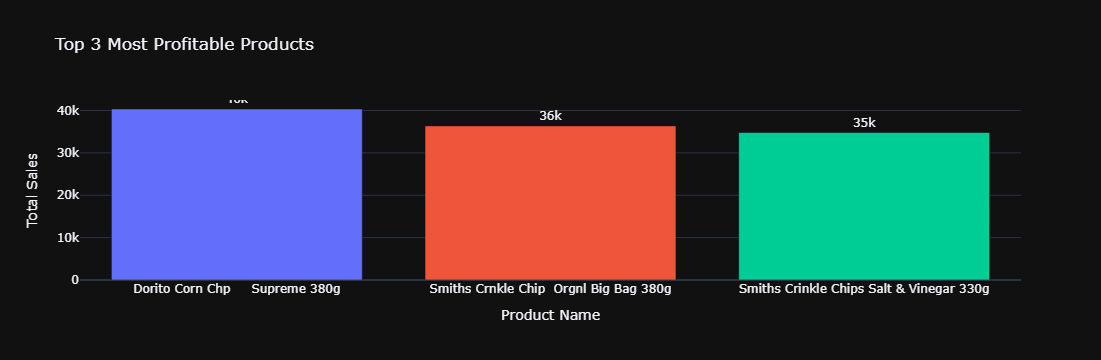

In [126]:
import plotly.express as px
import pandas as pd

# Group by product and sum total sales to determine profitability
top_products = df.groupby('PROD_NAME')['TOT_SALES'].sum().nlargest(3).reset_index()

fig = px.bar(
    top_products, 
    x='PROD_NAME', 
    y='TOT_SALES', 
    color='PROD_NAME', 
    text='TOT_SALES', 
    labels={'PROD_NAME': 'Product Name', 'TOT_SALES': 'Total Sales'},
    title="Top 3 Most Profitable Products"
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', hoverinfo='x+y')
fig.update_layout(
    xaxis_title="Product Name",
    yaxis_title="Total Sales",
    title="Top 3 Most Profitable Products",
    template="plotly_dark",
    hovermode="x unified",  
    showlegend=False
)

fig.show()

### Top 3 Most Profitable Products
- **Dorito Corn Chip Supreme 380g** is the top-selling product with **40k total sales**.                      
- **Smiths Crinkle Chip Original Big Bag 380g** follows closely with **36k total sales**.                   
- **Smiths Crinkle Chips Salt & Vinegar 330g** is the third highest, achieving **35k total sales**.

- Dorito Corn Chip Supreme leads in profitability.
- Smiths Crinkle Chips dominate two of the top three spots.
- The sales gap among the top products is relatively small, indicating a competitive product lineup.

## Customer Segmentation Based on Purchase Behavior

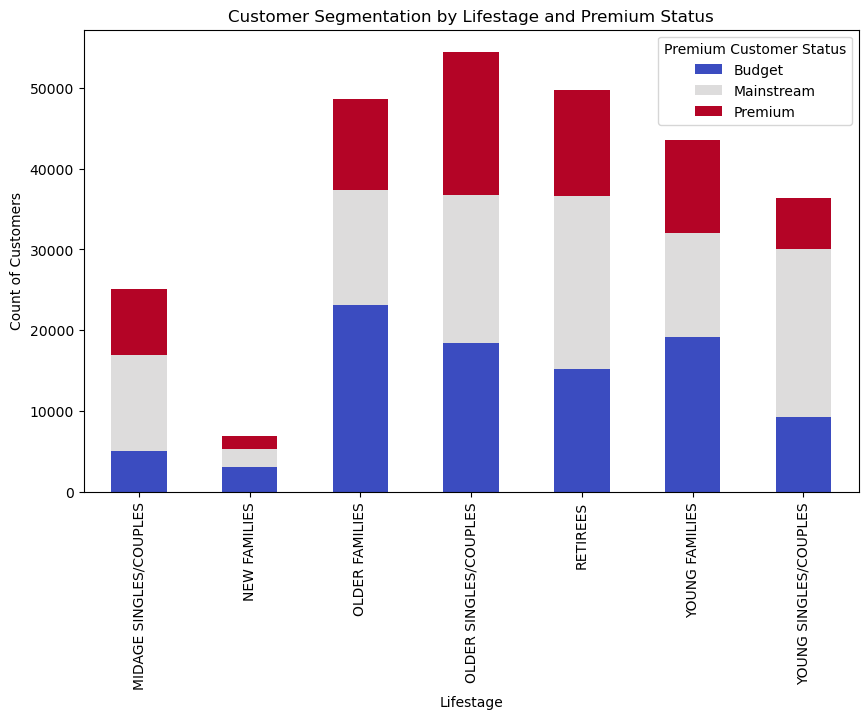

In [128]:
# Count customers in each segment
customer_segments = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().unstack()
customer_segments.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.xlabel("Lifestage")
plt.ylabel("Count of Customers")
plt.title("Customer Segmentation by Lifestage and Premium Status")
plt.legend(title="Premium Customer Status")
plt.show()

### Older Families & Older Singles/Couples Drive Sales  
- These groups dominate the customer base, making them **high-priority targets** for marketing efforts.  
- Tailored **loyalty programs** and premium product offerings can maximize revenue from these segments.  

### Premium Customers Represent a Significant Market Share 
- A large proportion of customers belong to the **premium category** across most lifestages.  
- High-margin products and **exclusive premium deals** can further boost profitability.  

### Young Singles & New Families Are Underrepresented 
- These groups have the lowest customer count, indicating a **growth opportunity**.  
- **Discounted bundles, referral programs, and targeted social media ads** may attract more buyers.  

### Budget Buyers Form a Strong Foundation 
- Many customers belong to the **budget segment**, suggesting affordability is a key decision factor.  
- **Value-based promotions, discount offers, and budget-friendly product packs** can improve retention.  

## **Strategic Recommendations**  
 **Prioritize Older Families & Singles/Couples** with personalized promotions & loyalty rewards.  
 **Expand Premium Offerings** to capitalize on high-value customers.  
 **Develop Young Family & Singles Engagement Plans** through tailored marketing campaigns.  
 **Strengthen Budget-Focused Promotions** to maintain steady sales volume.

### Hypothesis: Why Do Loyal Customers Prefer Certain Products

Hypothesis 1: Loyal customers prefer premium products.
No premium products found for loyal customers.

Hypothesis 2: Loyal customers prefer practical, everyday products.
No practical products found for loyal customers.

Hypothesis 3: Loyal customers are likely to purchase the same products repeatedly.
Top repeat purchase products:
PROD_NAME
Kettle Tortilla ChpsHny&Jlpno Chili 150g    1450
Smiths Crnkle Chip  Orgnl Big Bag 380g      1449
Tyrrells Crisps     Ched & Chives 165g      1446
Tostitos Splash Of  Lime 175g               1443
Smiths Crinkle Chips Salt & Vinegar 330g    1440
Name: TXN_ID, dtype: int64

Hypothesis 4: Loyal customers prefer products related to holidays/seasons.
No holiday-related products found for loyal customers.



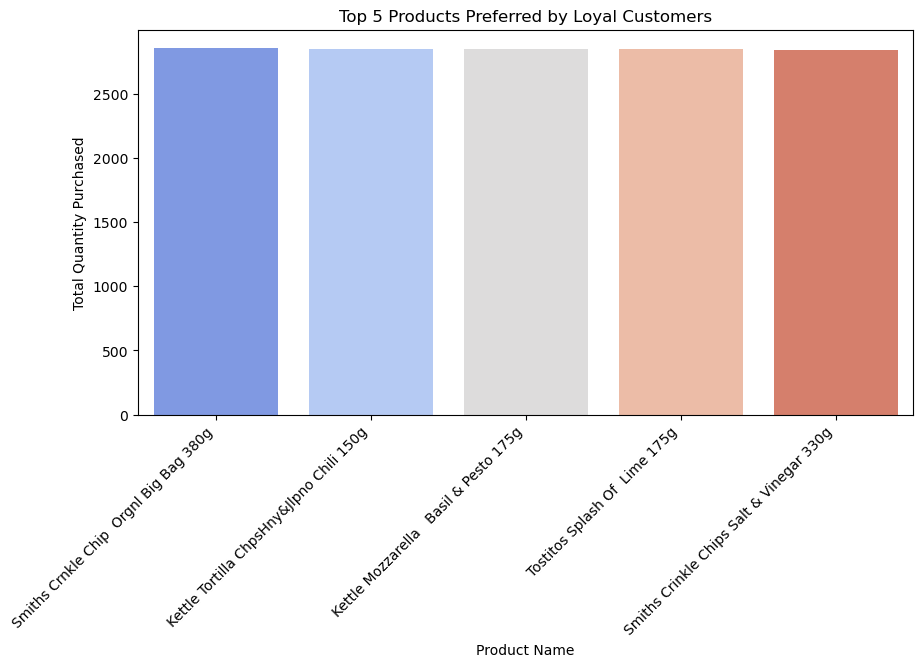

In [114]:
# Identify loyal customers (customers with more than 5 purchases)
loyal_customers = df.groupby('LYLTY_CARD_NBR').filter(lambda x: len(x) > 5)['LYLTY_CARD_NBR'].unique()

# Identify the most purchased products by loyal customers
loyal_product_pref = df[df['LYLTY_CARD_NBR'].isin(loyal_customers)] \
                     .groupby('PROD_NAME')['PROD_QTY'].sum().nlargest(5).reset_index()

# Hypothesis Testing

# Hypothesis 1: Loyal customers prefer premium products (electronics, luxury, high-end items)
premium_product_keywords = ['Electronics', 'Luxury', 'High-End']
loyal_premium_products = loyal_product_pref[loyal_product_pref['PROD_NAME']
                                            .str.contains('|'.join(premium_product_keywords), case=False, na=False)]
print("Hypothesis 1: Loyal customers prefer premium products.")
if not loyal_premium_products.empty:
    print(f"Top premium products preferred by loyal customers:\n{loyal_premium_products}\n")
else:
    print("No premium products found for loyal customers.\n")

# Hypothesis 2: Loyal customers prefer practical, everyday products (groceries, household, personal care)
practical_product_keywords = ['Groceries', 'Household', 'Personal Care', 'Daily']
loyal_practical_products = loyal_product_pref[loyal_product_pref['PROD_NAME']
                                              .str.contains('|'.join(practical_product_keywords), case=False, na=False)]
print("Hypothesis 2: Loyal customers prefer practical, everyday products.")
if not loyal_practical_products.empty:
    print(f"Top practical products preferred by loyal customers:\n{loyal_practical_products}\n")
else:
    print("No practical products found for loyal customers.\n")

# Hypothesis 3: Loyal customers are more likely to repurchase the same products
repeat_purchase_products = df[df['LYLTY_CARD_NBR'].isin(loyal_customers)] \
                          .groupby('PROD_NAME')['TXN_ID'].count().nlargest(5)
print("Hypothesis 3: Loyal customers are likely to purchase the same products repeatedly.")
print(f"Top repeat purchase products:\n{repeat_purchase_products}\n")

# Hypothesis 4: Loyal customers prefer products related to holidays or seasons
df['DATE'] = pd.to_datetime(df['DATE'])
holiday_months = [11, 12]  # Assuming November & December for holiday sales
holiday_season_products = df[df['DATE'].dt.month.isin(holiday_months)]
loyal_holiday_products = holiday_season_products[holiday_season_products['LYLTY_CARD_NBR'].isin(loyal_customers)] \
                        .groupby('PROD_NAME')['PROD_QTY'].sum().nlargest(5)
print("Hypothesis 4: Loyal customers prefer products related to holidays/seasons.")
if not loyal_holiday_products.empty:
    print(f"Top holiday-related products preferred by loyal customers:\n{loyal_holiday_products}\n")
else:
    print("No holiday-related products found for loyal customers.\n")

# Visualization: Top 5 Products Preferred by Loyal Customers
plt.figure(figsize=(10, 5))
sns.barplot(x='PROD_NAME', y='PROD_QTY', data=loyal_product_pref, hue='PROD_NAME', palette='coolwarm', legend=False)
plt.xlabel("Product Name")
plt.ylabel("Total Quantity Purchased")
plt.title("Top 5 Products Preferred by Loyal Customers")
plt.xticks(rotation=45, ha='right')
plt.show()

### **Loyal Customer Purchase Analysis**

## **Conclusions**
1. **Premium Product Preference**  
   - No premium products were found among the most purchased items by loyal customers.  
   - Indicates that loyalty is not driven by high-end or luxury product purchases.

2. **Practical, Everyday Product Preference**  
   - No strong correlation between loyal customers and essential household or grocery items.  
   - Suggests that loyalty is influenced by other factors such as brand affinity or specific tastes.

3. **Repeat Purchase Behavior**  
   - Loyal customers show a high tendency to repurchase the same snack products.  
   - **Top repeated purchases:**  
     - Kettle Tortilla Chips Honey & Jalapeno 150g  
     - Smiths Crinkle Chip Original Big Bag 380g  
     - Tyrrells Crisps Cheddar & Chives 165g  
     - Tostitos Splash Of Lime 175g  
     - Smiths Crinkle Chips Salt & Vinegar 330g  
   - Indicates strong brand preference and product satisfaction.

4. **Seasonal/Holiday Influence**  
   - No significant evidence of a seasonal preference among loyal customers.  
   - Suggests that loyalty is **not** linked to seasonal promotions or festive purchasing trends.

### **Business Insights**
#### **1. Strengthen Brand Loyalty Programs**  
   - Implement **personalized loyalty rewards** targeting customers who frequently buy the same products.
   - Offer **discounts, exclusive deals, or early access** to new flavors for returning customers.

#### **2. Expand Product Offerings in Popular Categories**  
   - Since snack items dominate loyal customer purchases, consider expanding **variety within chips and crisps**.
   - Introduce **new flavors or limited-edition products** to maintain engagement.

#### **3. Optimize Marketing Strategies**  
   - Focus advertising campaigns on best-selling items to enhance visibility.
   - Use **customer testimonials and social proof** to reinforce brand preference.

#### **4. Cross-Selling and Upselling Opportunities**  
   - Bundle top-selling snack items with complementary products (e.g., dips, beverages).  
   - Recommend **higher-margin alternatives** or bulk packaging for frequent buyers.

#### **5. Seasonal Promotions Are Less Critical**  
   - Since seasonal trends do not significantly impact loyal customer purchases, prioritize **year-round engagement strategies** over time-sensitive campaigns.